In [ ]:
import os
import pandas as pd

# Caminho onde estão os arquivos .csv
folder_path = '/content/drive/MyDrive/read_cassandra'  # Alterar para o caminho correto

# Lista todos os arquivos .csv na pasta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Lista para armazenar os dataframes
dataframes = []

# Processa cada arquivo .csv
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    # Lê o arquivo .csv
    df = pd.read_csv(file_path)

    # Modifica os nomes das colunas para incluir o nome do arquivo
    df.columns = [f"{col}_{csv_file.replace('.csv', '')}" for col in df.columns]

    # Inverte as colunas
    df = df.iloc[::-1].reset_index(drop=True)

    # Adiciona o dataframe à lista
    dataframes.append(df)

# Junta todos os dataframes em um só
final_df = pd.concat(dataframes, axis=1)

# Salva o arquivo final
final_df.to_csv('arquivo_final.csv', index=False)

print("Processamento concluído. Arquivo final salvo como 'arquivo_final.csv'.")


Processamento concluído. Arquivo final salvo como 'arquivo_final.csv'.


In [ ]:
import pandas as pd

# Função para limpar e converter os dados para números
def limpar_e_converter(valor):
    # Remover separadores de milhar (vírgulas ou pontos)
    valor = str(valor).replace(',', '').replace('.', '')
    try:
        return pd.to_numeric(valor)
    except ValueError:
        return None  # Se não for numérico, retorna None

# Carregar o arquivo CSV
df = pd.read_csv('/content/arquivo_final.csv')

# Identificar as colunas de interesse
mtu_columns = [col for col in df.columns if col.startswith('mtu_')]
mem_columns = [col for col in df.columns if col.startswith('Committed_AS_')]

# Limpar e converter para numérico as colunas
df[mtu_columns] = df[mtu_columns].applymap(limpar_e_converter)
df[mem_columns] = df[mem_columns].applymap(limpar_e_converter)

# Tratar valores NaN (substituindo por 0 ou qualquer outro valor se necessário)
df[mtu_columns] = df[mtu_columns].fillna(0)
df[mem_columns] = df[mem_columns].fillna(0)

# Calcular a média das colunas
df['Média_mtu'] = df[mtu_columns].mean(axis=1)
df['Média_mem_committed'] = df[mem_columns].mean(axis=1)

# Salvar o novo arquivo CSV com as médias
df.to_csv('arquivo_semdata_media.csv', index=False)

# Criar um novo DataFrame com apenas as colunas de médias
df_media = df[['Média_mtu', 'Média_mem_committed']]

# Salvar as médias em um novo arquivo CSV
df_media.to_csv('arquivo_semdata_media_labels.csv', index=False)

print("Médias calculadas e novos arquivos salvos com sucesso!")


<ipython-input-3-5913dcc74182>:13: DtypeWarning: Columns (0,2,9,15,19,23,42,49,51,59,69,76,130,189,228,314,321,468,472,476) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/arquivo_final.csv')
<ipython-input-3-5913dcc74182>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[mtu_columns] = df[mtu_columns].applymap(limpar_e_converter)
<ipython-input-3-5913dcc74182>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[mem_columns] = df[mem_columns].applymap(limpar_e_converter)


Médias calculadas e novos arquivos salvos com sucesso!


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Tente carregar o arquivo com o delimitador correto
file_path = "/content/arquivo_final.csv"

# Tente com tabulação primeiro
data = pd.read_csv(file_path, delimiter="\t")

# Se ainda não der certo, tente com outros delimitadores, como vírgula
if len(data.columns) == 1:  # Isso indica que as colunas ainda não foram separadas
    data = pd.read_csv(file_path, delimiter=",")  # Tenta com vírgula

# Verificar as colunas corrigidas
print("Colunas encontradas:", data.columns)

# Corrigir o target mean removendo a vírgula
data['mean,_mean'] = data['mean,_mean'].str.replace(',', '').astype(float)

# Converter todas as colunas para tipo numérico
data = data.apply(pd.to_numeric, errors='coerce')

# Normalizar os dados (exceto a coluna target 'mean')
scaler = MinMaxScaler()
data[:] = scaler.fit_transform(data)

# Salvar os dados normalizados em um novo CSV
normalized_file_path = "/content/Normalized_Read_Dataset.csv"
data.to_csv(normalized_file_path, index=False)

print(f"Dados normalizados e salvos em {normalized_file_path}")


<ipython-input-7-ca8615107b1b>:12: DtypeWarning: Columns (0,2,9,15,19,23,42,49,51,59,69,76,130,189,228,314,321,468,472,476) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=",")  # Tenta com vírgula


Colunas encontradas: Index(['time_Node1_system_cpu_some_pressure_stall_time',
       'time.1_Node1_system_cpu_some_pressure_stall_time',
       'time_Node3_system_cpu_some_pressure_stall_time',
       'time.1_Node3_system_cpu_some_pressure_stall_time',
       'time_Node1_net_mtu_enp7s0', 'mtu_Node1_net_mtu_enp7s0',
       'time_Node1_net_fifo_enp3s0', 'receive_Node1_net_fifo_enp3s0',
       'transmit_Node1_net_fifo_enp3s0',
       'time_Node1_system_memory_some_pressure',
       ...
       'load15_Node3_system_load', 'time_Node1_system_load',
       'load1_Node1_system_load', 'load5_Node1_system_load',
       'load15_Node1_system_load', 'time_Node1_system_cpu_some_pressure',
       'some 10_Node1_system_cpu_some_pressure',
       'some 60_Node1_system_cpu_some_pressure',
       'some 300_Node1_system_cpu_some_pressure', 'mean,_mean'],
      dtype='object', length=481)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
<ipython-input-7-ca8615107b1b>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.13333333 0.13333333 0.13333333 ... 0.06666667 0.06666667 0.06666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[:] = scaler.fit_transform(data)
<ipython-input-7-ca8615107b1b>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.3 0.3 0.3 ... 0.1 0.1 0.1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[:] = scaler.fit_transform(data)
<ipython-inp

Dados normalizados e salvos em /content/Normalized_Read_Dataset.csv


Linhas totais antes da limpeza: 3635
Resumo dos valores ausentes por coluna:
time.1_Node1_system_cpu_some_pressure_stall_time    1818
time_Node3_system_cpu_some_pressure_stall_time      3635
time.1_Node3_system_cpu_some_pressure_stall_time    1818
active_Node1_system_active_processes                   0
load1_Node2_system_load                             2908
                                                    ... 
load15_Node3_system_load                            2908
load1_Node1_system_load                             2908
load5_Node1_system_load                             2908
load15_Node1_system_load                            2908
mean                                                  34
Length: 102, dtype: int64
Valores ausentes após o preenchimento:
0
PC1     -0.019872
PC2     -0.028931
PC3      0.021765
PC4      0.025330
PC5     -0.027222
           ...   
PC98     0.013190
PC99    -0.001515
PC100   -0.011402
PC101   -0.002708
mean     1.000000
Name: mean, Length: 102, dtype:

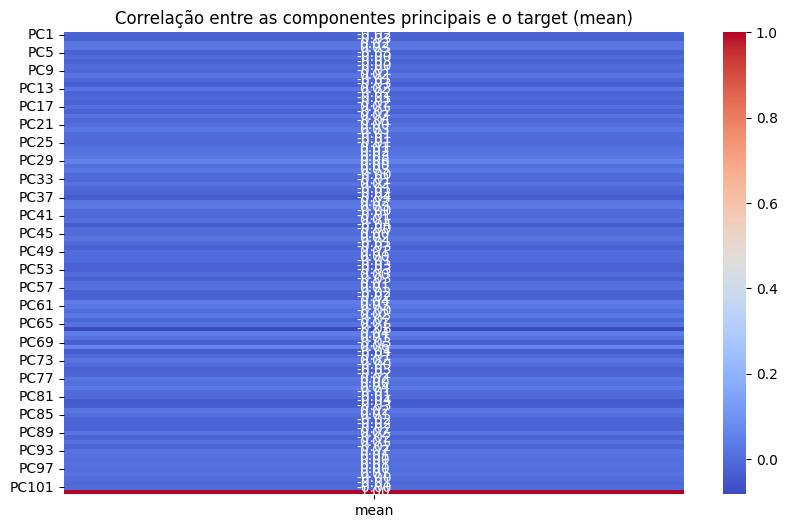

Top features mais correlacionadas com o target 'mean':
PC66    0.082537
PC70    0.064613
PC29    0.056631
PC37    0.043541
PC82    0.041540
Name: mean, dtype: float64


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV atualizado
df = pd.read_csv('/content/Read_Dataset.csv')

# Exibir informações iniciais sobre os dados
print(f"Linhas totais antes da limpeza: {len(df)}")
print("Resumo dos valores ausentes por coluna:")
print(df.isnull().sum())

# Tratar valores ausentes
# Substituir valores ausentes por 0 (ou outra estratégia, como média/mediana)
df_filled = df.fillna(0)

# Garantir que apenas colunas numéricas sejam usadas
X = df_filled.select_dtypes(include=[float, int])

# Validar se ainda há NaN
print("Valores ausentes após o preenchimento:")
print(X.isnull().sum().sum())

# Definir a variável target
target = 'mean'

# Separar as features e o target
if target in df_filled.columns:
    y = df_filled[target]  # Target
    X = X.drop(columns=[target], errors='ignore')  # Remover o target das features
else:
    print(f"Erro: A coluna target '{target}' não está presente no dataset.")
    y = None

# Aplicar PCA diretamente
pca = PCA()
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])

# Adicionar o target "mean" ao DataFrame de PCA (se existir)
if y is not None:
    pca_df[target] = y

# Calcular a correlação entre as componentes principais e o target (se aplicável)
if y is not None:
    correlation_matrix = pca_df.corr()
    print(correlation_matrix[target])

    # Plotar a correlação entre as componentes principais e o target
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix[[target]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlação entre as componentes principais e o target (mean)')
    plt.show()

    # Identificar as features mais correlacionadas com o target
    feature_correlations = correlation_matrix[target].drop(target)
    top_features = feature_correlations.abs().sort_values(ascending=False).head()

    print("Top features mais correlacionadas com o target 'mean':")
    print(top_features)
else:
    print("Correlação não calculada, pois a coluna target não está presente.")


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('/content/Read_Dataset.csv')

# Tratar valores ausentes
df_filled = df.fillna(0)  # Ou use outra estratégia, como média/mediana

# Definir a variável target
target = 'mean'

# Separar as features e o target
if target in df_filled.columns:
    y = df_filled[target]  # Target
    X = df_filled.drop(columns=[target], errors='ignore')  # Features
else:
    print(f"Erro: A coluna target '{target}' não está presente no dataset.")
    y = None

# Selecionar apenas colunas numéricas
X = X.select_dtypes(include=[float, int])

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])

# Adicionar o target ao DataFrame de PCA
if y is not None:
    pca_df[target] = y

# Calcular a correlação entre os componentes principais e o target
if y is not None:
    correlation_matrix = pca_df.corr()
    component_correlation = correlation_matrix[target].drop(target)  # Excluir a correlação do target consigo mesmo

    # Exibir correlação com o target
    print("Correlação entre componentes principais e o target:")
    print(component_correlation)

    # Identificar os componentes principais mais correlacionados com o target
    top_components = component_correlation.abs().sort_values(ascending=False).head(3)
    print("\nComponentes principais mais correlacionados com o target:")
    print(top_components)

    # Identificar as features originais mais influentes para os principais componentes
    for component in top_components.index:
        component_index = int(component[2:]) - 1  # Extrair índice do componente (PC1 -> 0)
        feature_weights = pca.components_[component_index]

        # Criar um DataFrame para mostrar os pesos das features
        feature_contributions = pd.DataFrame({
            'Feature': X.columns,
            'Weight': feature_weights
        }).sort_values(by='Weight', key=abs, ascending=False)

        print(f"\nFeatures mais influentes para {component}:")
        print(feature_contributions.head(5))
else:
    print("Correlação não calculada, pois a coluna target não está presente.")


Correlação entre componentes principais e o target:
PC1     -0.019872
PC2     -0.028931
PC3      0.021765
PC4      0.025330
PC5     -0.027222
           ...   
PC97     0.004585
PC98     0.013190
PC99    -0.001515
PC100   -0.011402
PC101   -0.002708
Name: mean, Length: 101, dtype: float64

Componentes principais mais correlacionados com o target:
PC66    0.082537
PC70    0.064613
PC29    0.056631
Name: mean, dtype: float64

Features mais influentes para PC66:
                                   Feature    Weight
82                buffers_Node4_system_ram  0.630085
63                 cached_Node1_system_ram -0.529714
77                 cached_Node2_system_ram -0.252309
4                  load1_Node2_system_load  0.191226
19  some 10_Node2_system_cpu_some_pressure  0.163952

Features mais influentes para PC70:
                       Feature    Weight
64    buffers_Node1_system_ram  0.487698
99     load5_Node1_system_load  0.462232
100   load15_Node1_system_load -0.352609
82    buffers_Nod

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Substitua 'seu_arquivo.csv' pelo caminho do seu arquivo CSV
df = pd.read_csv('/content/Read_Dataset.csv')

# Dividir os dados em features (X) e target (y)
X = df.iloc[:, 1:]  # Todas as colunas, exceto a primeira
y = df.iloc[:, 0]   # A primeira coluna como target

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Criando o modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Buscando as melhores combinações de hiperparâmetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Treinando o modelo com o GridSearch
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Função de avaliação
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [ ]:
# Substitua 'seu_arquivo.csv' pelo caminho do seu arquivo CSV
df = pd.read_csv('/content/Read_Dataset.csv')

# Dividir os dados em features (X) e target (y)
X = df.iloc[:, 1:]  # Todas as colunas, exceto a primeira
y = df.iloc[:, 0]   # A primeira coluna como target

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Substitua 'seu_arquivo.csv' pelo caminho do seu arquivo CSV
df = pd.read_csv('/content/Read_Dataset.csv')

# Dividir os dados em features (X) e target (y)
X = df.iloc[:, 1:]  # Todas as colunas, exceto a primeira
y = df.iloc[:, 0]   # A primeira coluna como target

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Criando o modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Buscando as melhores combinações de hiperparâmetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Treinando o modelo com o GridSearch
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Melhores parâmetros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE): 0.019769754121247353
R² Score: -0.02568772261081609
Mean Absolute Error (MAE): 0.11226704847896601
Mean Absolute Percentage Error (MAPE): 33.96%


In [ ]:
# Modelo KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
model_knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)
print(f"Melhores parâmetros KNN: {grid_search_knn.best_params_}")
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
evaluate_model(y_test, y_pred_knn)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
Mean Squared Error (MSE): 0.021615018605965857
R² Score: -0.12142311291146823
Mean Absolute Error (MAE): 0.1163605352925741
Mean Absolute Percentage Error (MAPE): 34.74%


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Modelo SVM
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
model_svr = SVR()
grid_search_svr = GridSearchCV(estimator=model_svr, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train, y_train)
print(f"Melhores parâmetros SVM: {grid_search_svr.best_params_}")
y_pred_svr = grid_search_svr.best_estimator_.predict(X_test)
evaluate_model(y_test, y_pred_svr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros SVM: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Mean Squared Error (MSE): 0.019277377113971088
R² Score: -0.00014238460803572828
Mean Absolute Error (MAE): 0.11108373553179669
Mean Absolute Percentage Error (MAPE): 33.48%


In [ ]:
# Modelo Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model_dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)
print(f"Melhores parâmetros Decision Tree: {grid_search_dt.best_params_}")
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
evaluate_model(y_test, y_pred_dt)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error (MSE): 0.024127572378270103
R² Score: -0.25177858121151386
Mean Absolute Error (MAE): 0.12267550100957579
Mean Absolute Percentage Error (MAPE): 36.33%


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler


# Modelo LSTM
# Normalização dos dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Redimensionando os dados para 3D (necessário para LSTM)
X_train_3d = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_3d = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Definindo o modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_3d.shape[1], 1)),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Treinando o modelo LSTM
model_lstm.fit(X_train_3d, y_train, epochs=50, batch_size=32, verbose=2)

# Fazendo previsões
y_pred_lstm = model_lstm.predict(X_test_3d)

# Avaliando o modelo
evaluate_model(y_test, y_pred_lstm.flatten())


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 - 2s - 22ms/step - loss: 0.0517
Epoch 2/50
90/90 - 1s - 16ms/step - loss: 0.0206
Epoch 3/50
90/90 - 1s - 9ms/step - loss: 0.0205
Epoch 4/50
90/90 - 1s - 9ms/step - loss: 0.0203
Epoch 5/50
90/90 - 1s - 9ms/step - loss: 0.0202
Epoch 6/50
90/90 - 1s - 9ms/step - loss: 0.0202
Epoch 7/50
90/90 - 1s - 14ms/step - loss: 0.0203
Epoch 8/50
90/90 - 1s - 11ms/step - loss: 0.0202
Epoch 9/50
90/90 - 1s - 7ms/step - loss: 0.0202
Epoch 10/50
90/90 - 1s - 7ms/step - loss: 0.0201
Epoch 11/50
90/90 - 1s - 6ms/step - loss: 0.0203
Epoch 12/50
90/90 - 1s - 7ms/step - loss: 0.0200
Epoch 13/50
90/90 - 1s - 7ms/step - loss: 0.0200
Epoch 14/50
90/90 - 1s - 6ms/step - loss: 0.0201
Epoch 15/50
90/90 - 1s - 6ms/step - loss: 0.0200
Epoch 16/50
90/90 - 1s - 6ms/step - loss: 0.0199
Epoch 17/50
90/90 - 1s - 7ms/step - loss: 0.0201
Epoch 18/50
90/90 - 1s - 7ms/step - loss: 0.0201
Epoch 19/50
90/90 - 1s - 6ms/step - loss: 0.0201
Epoch 20/50
90/90 - 1s - 7ms/step - loss: 0.0201
Epoch 21/50
90/90 - 1s - 7ms/step - 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Configuração global de fonte
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

def scatter_plot(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='y = x')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.tight_layout()
    plt.savefig("scatter_plot.pdf")

# Plot 2: Residuals vs Predicted Values
def residuals_plot(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.tight_layout()
    plt.savefig("residuals_plot.pdf")

# Plot 3: Residuals Histogram
def residuals_histogram(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, alpha=0.7, edgecolor='k')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residuals Histogram")
    plt.tight_layout()
    plt.savefig("residuals_histogram.pdf")

# Plot 4: Parity Curve (similar to Scatter Plot)
def parity_curve(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Parity')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Parity Curve")
    plt.legend()
    plt.tight_layout()
    plt.savefig("parity_curve.pdf")

# Plot 5: Feature Importance
def feature_importance_plot(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importances[indices], align="center", alpha=0.7, edgecolor='k')
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=45, ha='right')
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.savefig("feature_importance.pdf")

# Plot 6: Distribution of Actual vs Predicted Values
def distribution_plot(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.hist(y_true, bins=20, alpha=0.7, label="Actual Values", edgecolor='k')
    plt.hist(y_pred, bins=20, alpha=0.7, label="Predicted Values", edgecolor='k')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Distribution of Actual vs Predicted Values")
    plt.legend()
    plt.tight_layout()
    plt.savefig("distribution_plot.pdf")

# Plot 7: Trend Curve by Value Range
def trend_curve(y_true, y_pred):
    bins = pd.cut(y_true, bins=10)
    bin_means = [y_pred[bins == b].mean() for b in bins.categories]
    bin_centers = [b.mid for b in bins.categories]

    plt.figure(figsize=(8, 6))
    plt.plot(bin_centers, bin_means, 'o-', label="Trend")
    plt.xlabel("Actual Value Range")
    plt.ylabel("Mean of Predicted Values")
    plt.title("Trend Curve by Value Range")
    plt.legend()
    plt.tight_layout()
    plt.savefig("trend_curve.pdf")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Configuração global de fonte
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

def scatter_plot(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='y = x')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Read_scatter_plot.pdf")

# Plot 2: Residuals vs Predicted Values
def residuals_plot(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.tight_layout()
    plt.savefig("Read_residuals_plot.pdf")

# Plot 3: Residuals Histogram
def residuals_histogram(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, alpha=0.7, edgecolor='k')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residuals Histogram")
    plt.tight_layout()
    plt.savefig("Read_residuals_histogram.pdf")

# Plot 4: Parity Curve (similar to Scatter Plot)
def parity_curve(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Parity')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Parity Curve")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Read_parity_curve.pdf")

# Plot 5: Feature Importance
def feature_importance_plot(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importances[indices], align="center", alpha=0.7, edgecolor='k')
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=45, ha='right')
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.savefig("Read_feature_importance.pdf")

# Plot 6: Distribution of Actual vs Predicted Values
def distribution_plot(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.hist(y_true, bins=20, alpha=0.7, label="Actual Values", edgecolor='k')
    plt.hist(y_pred, bins=20, alpha=0.7, label="Predicted Values", edgecolor='k')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Distribution of Actual vs Predicted Values")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Read_distribution_plot.pdf")

# Plot 7: Trend Curve by Value Range
def trend_curve(y_true, y_pred):
    bins = pd.cut(y_true, bins=10)
    bin_means = [y_pred[bins == b].mean() for b in bins.categories]
    bin_centers = [b.mid for b in bins.categories]

    plt.figure(figsize=(8, 6))
    plt.plot(bin_centers, bin_means, 'o-', label="Trend")
    plt.xlabel("Actual Value Range")
    plt.ylabel("Mean of Predicted Values")
    plt.title("Trend Curve by Value Range")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Read_trend_curve.pdf")

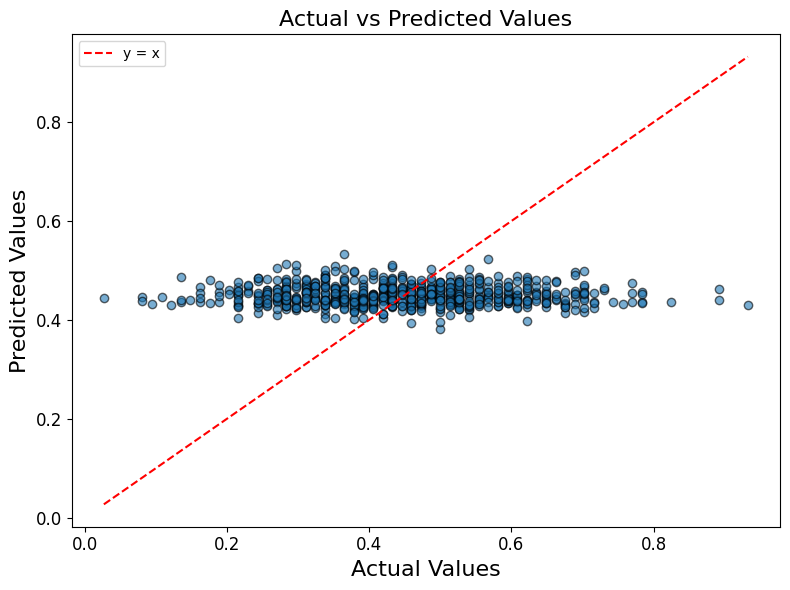

In [ ]:
scatter_plot(y_test, y_pred)


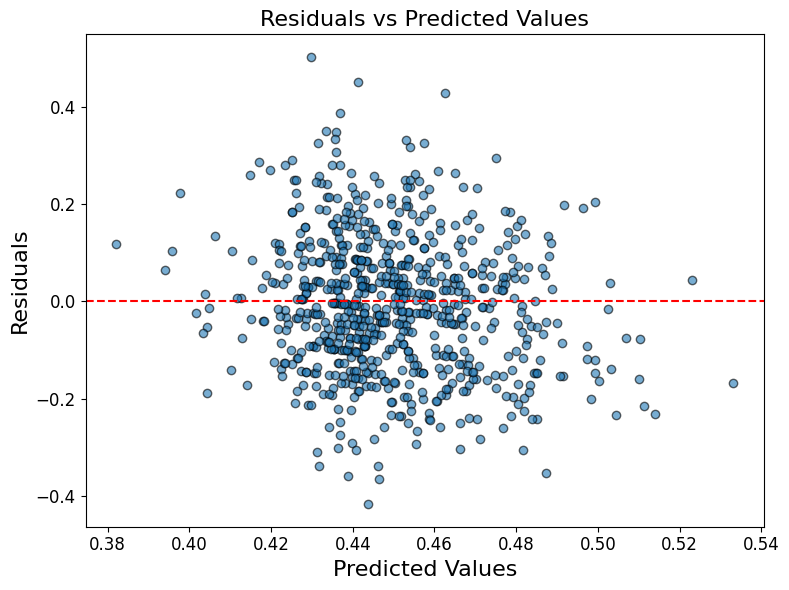

In [ ]:
residuals_plot(y_test, y_pred)

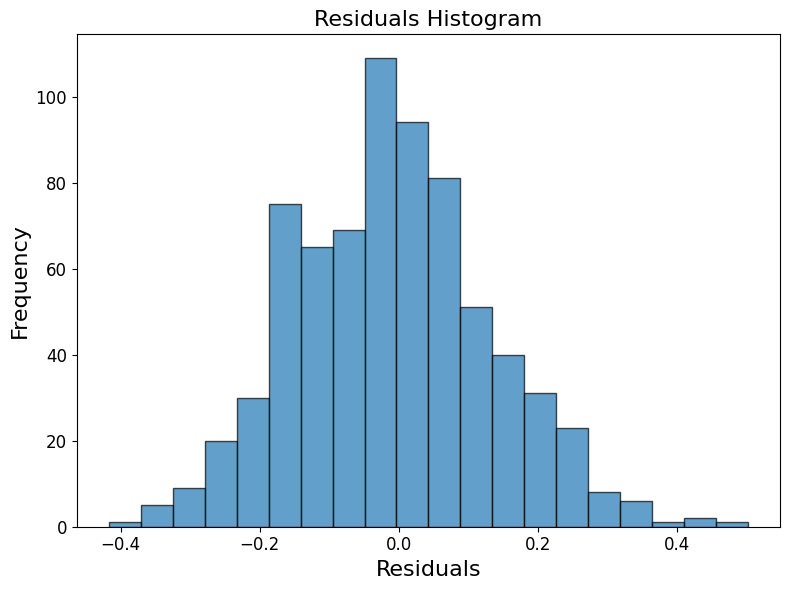

In [ ]:
residuals_histogram(y_test, y_pred)

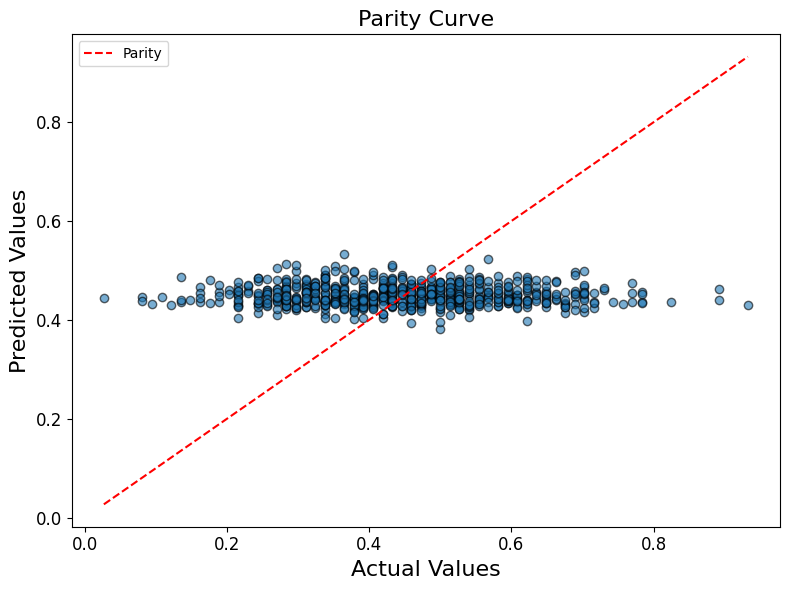

In [ ]:
parity_curve(y_test, y_pred)

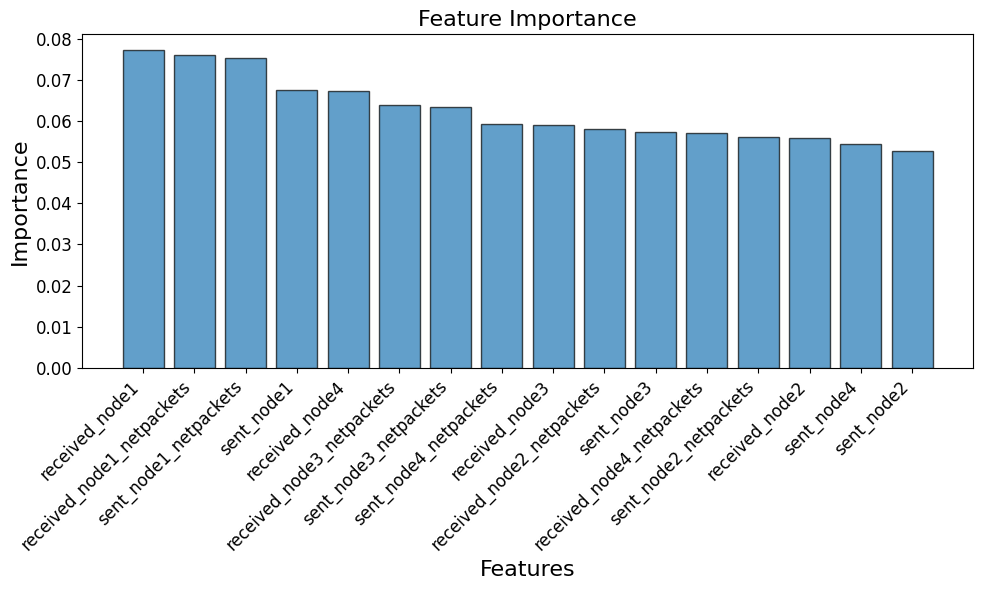

In [ ]:
feature_importance_plot(best_model, X_train.columns)

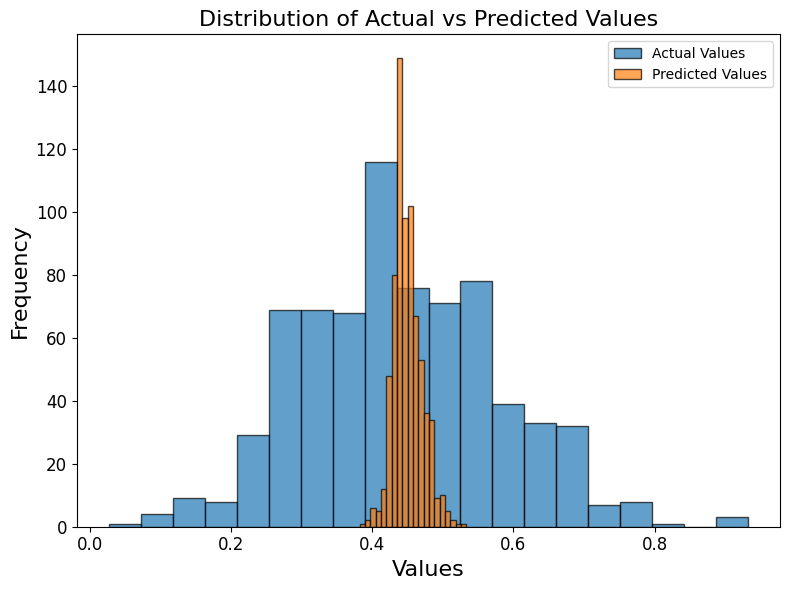

In [ ]:
distribution_plot(y_test, y_pred)